<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/Multiclassification_(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv', delimiter = ',')       # reading train set
df1 = df.drop(columns = ['ID'])
print(df1.shape)

(48000, 21)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df1.iloc[:38400])

print()
print()

print('CROSS VALIDATION SET')
print(df1.iloc[38400:43200])

print()
print()

print('TEST SET')
print(df1.iloc[43200:])

TRAIN SET
        Feature_1  Feature_2  Feature_3   Feature_4   Feature_5   Feature_6  \
0      -90.532634 -66.953472  79.261856 -111.800554  126.403549  111.509348   
1     -103.156720 -16.070400  87.819228   12.614599   51.347780   67.483725   
2       24.326153 -92.098078  82.238354  -56.795879   85.203996  127.916504   
3      -64.631737 -83.703583  84.135072   -5.516152   74.338494  112.630556   
4      -55.473830 -78.853237  88.129107   75.200543   76.991520   60.224711   
...           ...        ...        ...         ...         ...         ...   
38395  -45.530360  20.505481  90.252533  138.270800   91.603532  125.916310   
38396  -60.521765 -42.237328  90.369753  269.561863   92.076097   -5.283061   
38397  -92.806821 -10.345667  84.655842   55.862802   57.245586   22.425571   
38398  -56.680361 -55.998472  87.749697  395.280159   78.139892  139.756567   
38399  -48.095213  79.158835  86.852479   39.921551   15.855454   58.290488   

        Feature_7   Feature_8   Feature_9

In [ ]:
df_train = df.iloc[:38400]
df_cv = df.iloc[38400:43200]
df_test = df.iloc[43200:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_20']

x_train = features_train.to_numpy()
y_train = df_train['Class'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ -90.53263395  -66.95347161   79.26185595 ...  -16.24229669
   -32.07492465  -17.66602617]
 [-103.15671956  -16.07040001   87.81922753 ...  -36.47974913
  -130.24661901  -44.14365222]
 [  24.32615256  -92.09807783   82.23835394 ... -130.94825564
   -43.11352279  -37.33044832]
 ...
 [ -92.80682054  -10.34566693   84.65584236 ...  -85.69619713
   -61.57697522  -65.30032143]
 [ -56.68036093  -55.99847164   87.74969696 ...   20.01134236
   -81.71489859  -13.08237026]
 [ -48.0952133    79.15883523   86.85247902 ...  -21.62817318
  -107.9304225   -56.44615414]]

y_train = [1 2 4 ... 2 2 1]


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.56571807 -0.57317719 -2.15388543 ...  0.67685993  1.7249436
   1.45285191]
 [-0.92033606  0.22120171  0.54538883 ... -0.0352828  -0.99102716
   0.44137434]
 [ 2.66073284 -0.96573101 -1.21500083 ... -3.35956782  1.41955506
   0.70164703]
 ...
 [-0.62960131  0.31057538 -0.45244609 ... -1.76717745  0.90875409
  -0.3668362 ]
 [ 0.3852122  -0.40214937  0.52345662 ...  1.95260181  0.35162801
   1.62795315]
 [ 0.62637405  1.70790627  0.2404448  ...  0.48733446 -0.37363803
  -0.02859623]]


## **3. Visualising the Data**

In [ ]:
Class_0 = np.sum(y_train == 0)
Class_1 = np.sum(y_train == 1)
Class_2 = np.sum(y_train == 2)
Class_3 = np.sum(y_train == 3)
Class_4 = np.sum(y_train == 4)

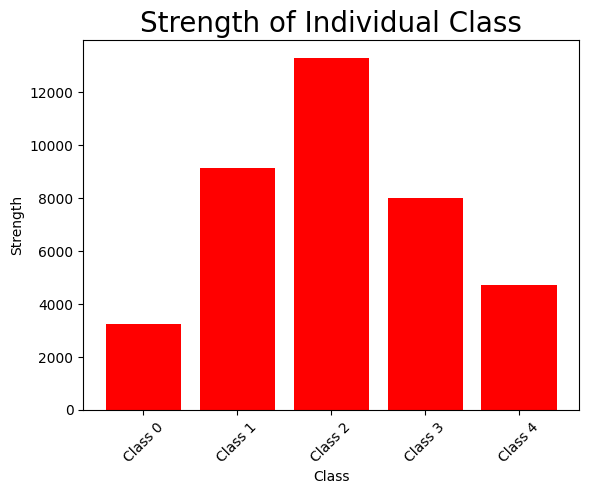

In [ ]:
Category = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
Value = [Class_0, Class_1, Class_2, Class_3, Class_4]

plt.bar(Category, Value, color = 'red')
plt.title('Strength of Individual Class', fontdict = {'fontsize' : 20})
plt.xlabel('Class')
plt.ylabel('Strength')

plt.xticks(rotation=45)
plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Softmax Function**

In [ ]:
def softmax(z):

    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / e_z.sum(axis=1, keepdims=True)

## **Defining ReLU Function**

In [ ]:
def relu(z):
  return np.maximum(0, z)

## **Forward Propogation**

In [ ]:
def forward_prop(x, w1, b1, w2, b2, w3, b3, w4, b4):

  z1 = np.matmul(x, w1) + b1
  a1 = relu(z1)

  z2 = np.matmul(a1, w2) + b2
  a2 = relu(z2)

  z3 = np.matmul(a2, w3) + b3
  a3 = relu(z3)

  z4 = np.matmul(a3, w4) + b4
  a4 = softmax(z4)

  return a1, a2, a3, a4

## **Defining Cost Function**

In [ ]:
def cost(a4, y, w1, w2, w3, w4):

  m = y.shape[0]
  cost = -np.sum(y * np.log(a4)) / m

  return cost

## **5. Backward Propogation**

In [ ]:
def back_prop(x, y, a1, a2, a3, a4, w1, w2, w3, w4):
  m = x.shape[0]

  dz4 = a4 - y
  dz4 /= m

  dw4 = np.matmul(a3.T, dz4)
  db4 = np.sum(dz4, axis=0, keepdims=False)

  dz3 = np.matmul(dz4, w4.T) * (a3 > 0)
  dw3 = np.matmul(a2.T, dz3)
  db3 = np.sum(dz3, axis=0, keepdims=False)

  dz2 = np.matmul(dz3, w3.T) * (a2 > 0)
  dw2 = np.matmul(a1.T, dz2)
  db2 = np.sum(dz2, axis=0, keepdims=False)

  dz1 = np.matmul(dz2, w2.T) * (a1 > 0)
  dw1 = np.matmul(x.T, dz1)
  db1 = np.sum(dz1, axis=0, keepdims=False)

  return dw1, db1, dw2, db2, dw3, db3, dw4, db4

## **6. Defining Gradient Descent**

In [ ]:
y_train_encoded = np.eye(5)[y_train -1]

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, w1, b1, w2, b2, w3, b3, w4, b4, alpha, num_iters):

  J_history = []

  for i in range(num_iters):

    a1, a2, a3, a4 = forward_prop(x_train, w1, b1, w2, b2, w3, b3, w4, b4)

    dw1, db1, dw2, db2, dw3, db3, dw4, db4 = back_prop(x_train, y_train_encoded, a1, a2, a3, a4, w1, w2, w3, w4)

    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    w3 -= alpha * dw3
    b3 -= alpha * db3
    w4 -= alpha * dw4
    b4 -= alpha * db4

    if i < 100000:
      J_history.append(cost(a4, y_train_encoded, w1, w2, w3, w4))             # storing cost with every iteration for
                                                                              # plotting later.
    if i % (num_iters//10) == 0:
      print(f"Epochs {i:6}/{epochs} : Cost {J_history[-1] :8.4f} ")

  return w1, b1, w2, b2, w3, b3, w4, b4, J_history

`Random Initialization of Weights`

In [ ]:
w1_int = np.random.randn(20, 50) * 0.01
b1_int = np.zeros((1, 50))
w2_int = np.random.randn(50, 25) * 0.01
b2_int = np.zeros((1, 25))
w3_int = np.random.randn(25, 12) * 0.01
b3_int = np.zeros((1, 12))
w4_int = np.random.randn(12, 5) * 0.01
b4_int = np.zeros((1, 5))

`Hyperparameters`

In [ ]:
epochs = 5000
tmp_alpha = 0.01                                 # learning rate

`Implementing Gradient Descent`

In [ ]:
%time

w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist = gradient_descent(x_train ,y_train_encoded, w1_int, b1_int, w2_int, b2_int, w3_int, b3_int, w4_int, b4_int,
                                                                                            tmp_alpha, epochs)


print(f"TRAIN COST estimated is ={J_hist[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Epochs      0/5000 : Cost   1.6094 
Epochs    500/5000 : Cost   1.5188 
Epochs   1000/5000 : Cost   1.5056 
Epochs   1500/5000 : Cost   1.5029 
Epochs   2000/5000 : Cost   1.5022 
Epochs   2500/5000 : Cost   1.5020 
Epochs   3000/5000 : Cost   1.5019 
Epochs   3500/5000 : Cost   1.5019 
Epochs   4000/5000 : Cost   1.5019 
Epochs   4500/5000 : Cost   1.5019 
TRAIN COST estimated is =  1.5019


`Learning Curve`

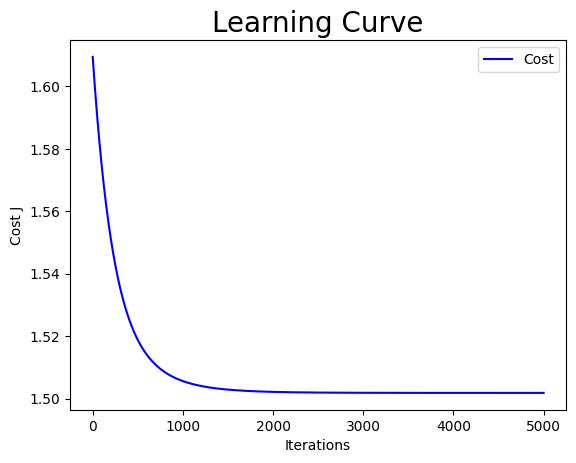

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

##**7. Learned Parameters**

In [ ]:
print(f'Obtained weights = {w1_fin}' )
print(f'{w2_fin}' )
print(f'{w3_fin}' )
print(f'{w4_fin}' )
print()
print(f'Obtained bias terms = {b1_fin}')
print(f'{b2_fin}')
print(f'{b3_fin}')
print(f'{b4_fin}')

Obtained weights = [[-1.20394488e-02  7.96162170e-04 -1.16290631e-02  9.65994846e-03
   4.99634768e-03 -1.28798867e-02  8.35233950e-03  1.37352833e-02
   2.45857055e-03 -8.73854610e-04  9.77195627e-03  3.29535396e-03
  -4.93719218e-03 -2.39752221e-02 -8.98936852e-03 -8.60935058e-04
   8.75256500e-03 -1.30196642e-02 -4.91260988e-03  4.24832416e-03
   5.40068150e-03  7.17929744e-03  1.05863913e-03 -4.43761350e-03
  -9.37723278e-03 -3.77267458e-03  3.41682267e-03  4.57225730e-03
  -7.64579695e-03  2.48561254e-03  4.14302518e-03  1.57124696e-03
   1.42243248e-03  4.00070613e-03  1.39714147e-02  2.83081187e-04
   2.66333659e-04  1.67145915e-03  1.07869673e-04  1.42167476e-02
  -5.33096642e-03  2.19732792e-03  4.50203623e-03 -6.49945843e-03
   2.27010621e-02  2.74123743e-02 -2.75394494e-03  5.57121546e-03
   4.72919837e-04  7.27596125e-03]
 [ 3.89946011e-03 -2.27549045e-03 -5.83881070e-03 -5.19334728e-03
  -4.81235933e-03 -3.87009513e-03 -9.99736674e-04 -1.42194815e-02
  -2.33770657e-02  2.0

##**8. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.loc[:, 'Feature_1':'Feature_20']

x_cv = features_cv.to_numpy()
y_cv = df_cv['Class'].to_numpy()


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[-1.13263993  1.23941198 -1.76222748 ...  0.2001453  -1.90688151
   1.75815523]
 [-1.90969546  0.62818622 -0.85769514 ... -0.15501583  0.29594054
  -1.3649632 ]
 [ 1.64059367  0.52485991  1.24011541 ...  1.30044233 -0.68464583
  -0.43207938]
 ...
 [ 1.1388733  -0.5401856   0.69905754 ... -1.54336691 -0.58575394
  -0.35818865]
 [ 0.69265917  0.56080492 -0.19534578 ...  0.24285602  0.39064773
   0.62929332]
 [ 0.58260271  0.60650702  0.60208354 ...  0.86180169 -0.12718634
  -0.15497566]]
y_cv = [1 3 3 ... 2 2 3]


In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

4800


`Computing Cross Validation Cost`

In [ ]:
a1, a2, a3, a4 = forward_prop(x_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

y_cv_encoded = np.eye(5)[y_cv - 1]

cv_cost = cost(a4, y_cv_encoded,w1_fin, w2_fin, w3_fin, w4_fin)

print(f"Cross Validation Cost = {cv_cost : 8.4f}")

Cross Validation Cost =   1.4968


##**9. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_20']

x_test = features_test.to_numpy()
y_test = df_test['Class'].to_numpy()

`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[ 0.03392202  0.8462795  -1.53048323 ... -2.43329103 -0.82464194
  -0.14299904]
 [ 0.22663722 -0.03703402 -1.75063371 ...  0.59298566  0.95599202
  -0.12554983]
 [-0.14766545  1.81512679 -0.55454843 ... -1.61672713 -0.06655681
   0.84632475]
 ...
 [ 0.93459266  0.45827354  0.28383188 ... -0.20114574  0.76834823
   0.75760745]
 [-0.29979046  1.15635131  0.53750939 ...  0.463272    1.06014289
  -0.59125528]
 [ 0.08977743 -0.13393632  0.87435727 ...  0.89019977 -0.91948049
  -0.11049559]]
y_test = [2 4 2 ... 1 3 2]


In [ ]:
m_test = x_test.shape[0]
print(m_test)

4800


`Computing Test Cost`

In [ ]:
a1, a2, a3, a4 = forward_prop(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

y_test_encoded = np.eye(5)[y_test - 1]
test_cost = cost(a4, y_test_encoded, w1_fin, w2_fin, w3_fin, w4_fin)

print(f"Test Cost = {test_cost: 8.4f}")

Test Cost =   1.5046


##**10. Estimating Accuracy**

`Accuracy of Test Set Predictions`

In [ ]:
_, _, _, a4_test = forward_prop(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
y_pred_test = np.argmax(a4_test, axis=1) + 1

accuracy_test = np.mean(y_pred_test == y_test)
print(f"Test Accuracy = {accuracy_test * 100}%")

Test Accuracy = 34.208333333333336%


`Accuracy of CV set Predictions`

In [ ]:
_, _, _, a4_cv = forward_prop(x_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
y_pred_cv = np.argmax(a4_cv, axis=1) + 1


accuracy_cv = np.mean(y_pred_cv == y_cv)
print(f"Cross Validation Accuracy = {accuracy_cv * 100}%")

Cross Validation Accuracy = 34.625%


`Accuracy of Train Set Predictions`

In [ ]:
_, _, _, a4_train = forward_prop(x_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
y_pred_train = np.argmax(a4_train, axis=1) + 1

accuracy_train = np.mean(y_pred_train == y_train)
print(f"Train Accuracy = {accuracy_train * 100}%")

Train Accuracy = 34.671875%


##**11. Final Model**

In [ ]:
def nn_multi(input, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin):

  a1, a2, a3, a4 = forward_prop(input, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

  return a4

##**12. Confirming with array full of 2**



In [ ]:
chk = np.full((38400,), 2)
chk

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
count = 0

for i in range(len(chk)):
  if chk[i] == y_train[i]:
    count += 1

`Accuracy`

In [ ]:
accuracy = count / len(chk)
print(f"Accuracy = {accuracy * 100}%")

Accuracy = 34.671875%
